In [30]:
# %matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import requests
from scipy import stats
from scipy.stats import linregress

spotify_data = pd.read_csv("Resources/data.csv")

spot_data = pd.DataFrame(spotify_data)

spot_data.head()



,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [13]:
spot_data.columns

drop_columns = ['acousticness', 'duration_ms', 'energy', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'speechiness', 'tempo',
       'valence']
clean_spot = spot_data.drop(columns=drop_columns)

clean_spot = clean_spot.rename(columns={"artists":"Artist","danceability":"Danceability (%)","explicit":"Explicit",
                                        "name":"Song Name","popularity":"Popularity (%)","release_date":"Release Date",
                                        "year":"Release Year"})

clean_spot["Danceability (%)"] = clean_spot["Danceability (%)"]*100

# clean_spot["Danceability"] = clean_spot["Danceability"].map("{0:,.2f}%".format)

clean_spot["Artist"] = clean_spot["Artist"].str.strip('[]')
clean_spot["Artist"] = clean_spot["Artist"].str.strip('[""]')
clean_spot["Artist"] = clean_spot["Artist"].str.strip("['']")

clean_spot.head()

,Artist,Danceability (%),Explicit,Song Name,Popularity (%),Release Date,Release Year
0,Mamie Smith,59.8,0,Keep A Song In Your Soul,12,1920,1920
1,Screamin' Jay Hawkins,85.2,0,I Put A Spell On You,7,1920-01-05,1920
2,Mamie Smith,64.7,0,Golfing Papa,4,1920,1920
3,Oscar Velazquez,73.0,0,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,1920
4,Mixe,70.4,1,Xuniverxe,2,1920-10-01,1920


In [14]:
#Get Artists Names & Popularity, and Dancability Columns
#Get Song titles, Popularity and Danceability Columns


#Groupby Artist Name, Sort by Popularity
#Groupby Song Title, Sort by Popularity

#Groupby Artist Name, Sort by Danceability
#Groupby Song Title, Sort by Danceability

#Find the relationship between Explicit & Popularity of an artist and a song

#Groupby Explicit, sort by Popularity of an Artist
#Groupby Explicit, sort by Popularity of an Song
clean_spot


,Artist,Danceability (%),Explicit,Song Name,Popularity (%),Release Date,Release Year
0,Mamie Smith,59.8,0,Keep A Song In Your Soul,12,1920,1920
1,Screamin' Jay Hawkins,85.2,0,I Put A Spell On You,7,1920-01-05,1920
2,Mamie Smith,64.7,0,Golfing Papa,4,1920,1920
3,Oscar Velazquez,73.0,0,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,1920
4,Mixe,70.4,1,Xuniverxe,2,1920-10-01,1920
...,...,...,...,...,...,...,...
174384,"DJ Combo', 'Sander-7', 'Tony T",79.2,0,The One,0,2020-12-25,2020
174385,Alessia Cara,42.9,0,A Little More,0,2021-01-22,2021
174386,Roger Fly,67.1,0,Together,0,2020-12-09,2020
174387,Taylor Swift,46.2,1,champagne problems,69,2021-01-07,2021


In [15]:
#How many artist contributed to this database?

unique_artists = clean_spot["Artist"].nunique()
total_artists = clean_spot["Artist"].count()
art_percentage = unique_artists/total_artists
art_percentage = art_percentage * 100
art_percentage = round(art_percentage, 2)
print(f"There are {total_artists} Tracks in this database, and {unique_artists} unique artists in the DB. {art_percentage}% of Artists made the majority of the songs in this Database")



There are 174389 Tracks in this database, and 36194 unique artists in the DB. 20.75% of Artists made the majority of the songs in this Database


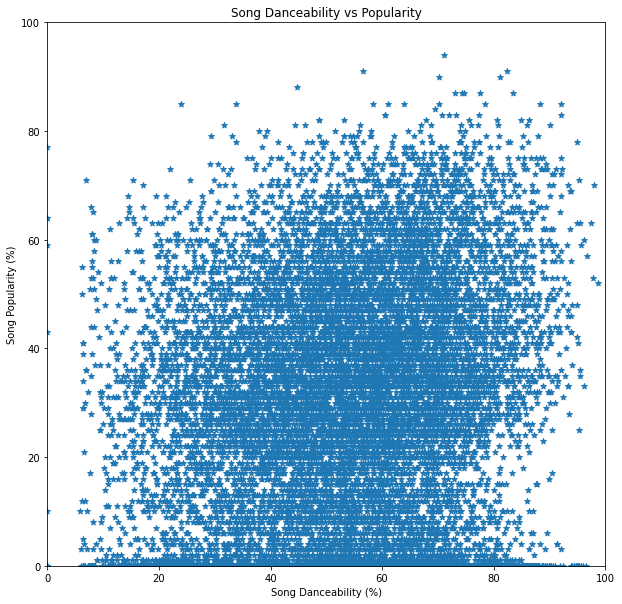

There seems to be no relation between danceability & Popularity given the equal distribution of of populatity among Danceability axis. In fact, on the very high end of dancability, it seems as though populatity declines making the hypothisis null.


In [37]:
samp_spot = clean_spot.sample(frac=0.1, replace=False, random_state=1)

plt.figure(figsize=(10,10))
plt.title("Song Danceability vs Popularity")
plt.scatter(samp_spot["Danceability (%)"],samp_spot["Popularity (%)"], marker="*")
plt.xlim(0, 100)
plt.ylim(0, 100)
# plt.xticks([0, 500,1000], ["0%","50%","100%"])
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=True,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False) 
plt.xlabel("Song Danceability (%)")
plt.ylabel("Song Popularity (%)")
plt.savefig("Images/PopvsDance.png")
plt.show()


print("There seems to be no relation between danceability & Popularity given the equal distribution of of populatity among Danceability axis. In fact, on the very high end of dancability, it seems as though populatity declines making the hypothisis null.")

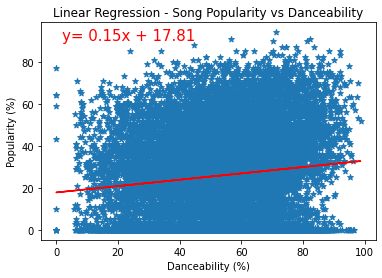

The r-value is: 0.014650096390543904


In [38]:
#Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(samp_spot["Danceability (%)"],samp_spot["Popularity (%)"])
regress = samp_spot["Danceability (%)"] * slope + intercept
lin_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(samp_spot["Danceability (%)"],samp_spot["Popularity (%)"], marker="*")
plt.plot(samp_spot["Danceability (%)"], regress, "r-")
plt.annotate(lin_eq, (2, 90), fontsize=15, color="red")
plt.ylabel("Popularity (%)")
plt.xlabel("Danceability (%)")
plt.title("Linear Regression - Song Popularity vs Danceability")
plt.savefig("Images/LinRegress.png")
plt.show()

# x = spot_data.danceability
# y = spot_data.popularity

# res = stats.linregress(x, y)
print(f"The r-value is: {rvalue**2}")


In [60]:
print(rvalue)
print(pvalue)

0.12103758255411376
6.534386803326427e-58


In [54]:
groupie = clean_spot.groupby('Artist').count()

groupie = groupie.sort_values('Danceability (%)', ascending=False)
groupie = groupie.drop(columns=["Danceability (%)","Explicit","Song Name","Popularity (%)","Release Date"])
groupie = groupie.rename(columns={"Release Year":"Song Count"})

groupie = groupie.head(1000)


In [41]:

clean_spot.sort_values(by='Danceability (%)', ascending=False, inplace=True)
clean_spot.head(20)

,Artist,Danceability (%),Explicit,Song Name,Popularity (%),Release Date,Release Year
13734,Tone-Loc,98.8,0,Funky Cold Medina,56,1989-01-01,1989
54525,"Spooner Street', 'Rio Dela Duna', 'Leonardo La...",98.7,0,Cool - Leonardo La Mark Remix,0,2021-01-15,2021
141441,"Pitbull', 'Trina', 'Young Bo",98.6,1,Go Girl,52,2012-05-08,2012
37455,Tone-Loc,98.5,0,Funky Cold Medina - Re-Recorded,7,2010-12-21,2010
92739,Nilla Pizzi,98.5,0,O mama mama - Remix 2014,0,2014-11-27,2014
171536,"Dan McKie', 'Zigmund Slezak",98.5,0,Dddance - Zigmund Slezak Remix,0,2013-01-07,2013
173266,Michael Beyer,98.2,0,Stuck in Your Brain,0,2016-07-07,2016
154230,Daft Punk,98.0,0,Teachers,41,1997-01-16,1997
13910,Vanilla Ice,98.0,0,Ice Ice Baby,61,1990-01-01,1990
39276,347aidan,98.0,1,Dancing in My Room,84,2020-10-26,2020


In [42]:
artist = clean_spot.groupby("Artist").sum()
artist.sort_values(by='Popularity (%)', ascending=False, inplace=True)
# artist_sum = clean_spot.groupby("Arist").sum()
# # clean_spot.sort_values(by='Popularity', ascending=False, inplace=True)
artist.drop(columns=["Explicit","Release Year"],inplace=True)
art = artist.head(100)
art
# art.plot(how='bar')

# x_axis = np.arange(1920, 2022, 1)
# dance_points = year_df["Artist"]
# pop_points = year_df["Popularity"]

# dance_plot = plt.plot(x_axis, dance_points, color="blue", label="Danceability")
# pop_plot = plt.plot(x_axis, pop_points, color="orange", label="Popularity")
# plt.xlim(1915, 2030)
# plt.ylim(-5, 105)
# plt.xlabel("Release Year")
# plt.ylabel("Danceability and Popularity (%)")
# plt.title("Average Danceability and Popularity of Songs Over Time")
# plt.legend(labels=["Danceability", "Popularity"], loc="best")
# plt.grid()
# plt.savefig("Images/DancePopOverTime.png")
# plt.show()



,Danceability (%),Popularity (%)
Artist,,
The Beatles,21513.59,19110
Frank Sinatra,23558.98,17434
Elvis Presley,24299.30,16998
Fleetwood Mac,26164.10,15927
The Rolling Stones,23705.30,15817
...,...,...
Bob Seger,5868.90,4107
Javier Solís,7888.70,4094
Joni Mitchell,6359.00,4090


In [47]:
grouped_year = clean_spot.groupby(["Release Year"])
grouped_year.dtypes

year_df = pd.DataFrame({"Danceability (%)": grouped_year["Danceability (%)"].mean(),
                       "Popularity (%)": grouped_year["Popularity (%)"].mean()})
year_df

,Danceability (%),Popularity (%)
Release Year,,
1920,51.575014,0.610315
1921,43.217051,0.391026
1922,57.561983,0.090909
1923,57.734054,5.205405
1924,54.989407,0.661017
...,...,...
2017,58.047519,31.662338
2018,60.273091,27.599484
2019,60.310142,32.346930


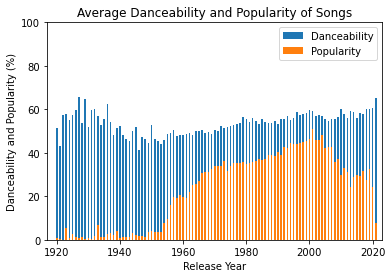

In [64]:
years = np.arange(1920, 2022, 1)
dance_points = year_df["Danceability (%)"]
pop_points = year_df["Popularity (%)"]

fig, ax = plt.subplots()
ind = years
width = .5
p1 = ax.bar(ind, dance_points, width)
p2 = ax.bar(ind, pop_points, width)
ax.set_title("Danceability and Popularity (%)")
# ax.set_xticks(ind + width / 2)
ax.autoscale_view()
plt.xlim(1917, 2023)
plt.ylim(0, 100)
ax.legend((p1, p2), ("Danceability", "Popularity"))
plt.xlabel("Release Year")
plt.ylabel("Danceability and Popularity (%)")
plt.title("Average Danceability and Popularity of Songs")
plt.savefig("Images/DancePopOverTime.png")
plt.show()

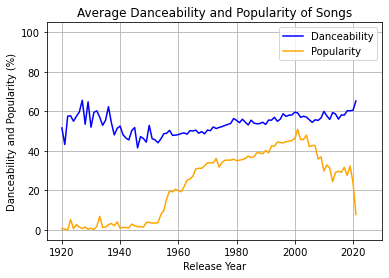

In [59]:
# x_axis = np.arange(1920, 2022, 1)
# dance_points = year_df["Danceability (%)"]
# pop_points = year_df["Popularity (%)"]

# dance_plot = plt.plot(x_axis, dance_points, color="blue", label="Danceability")
# pop_plot = plt.plot(x_axis, pop_points, color="orange", label="Popularity")
# plt.xlim(1915, 2030)
# plt.ylim(-5, 105)
# plt.xlabel("Release Year")
# plt.ylabel("Danceability and Popularity (%)")
# plt.title("Average Danceability and Popularity of Songs")
# plt.legend(labels=["Danceability", "Popularity"], loc="best")
# plt.grid()
# # plt.savefig("Images/DancePopOverTime.png")
# plt.show()